In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from utils import classification_evaluation,user_input
from sklearn.ensemble import AdaBoostClassifier

In [2]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')
dataframe = dataframe.drop(['age', 'id'], axis=1)

In [3]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]
# use the same test set as in previous lecture
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [4]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25288, 10), (6322, 10), (25288,), (6322,))

In [5]:
ada = AdaBoostClassifier()

scaler = StandardScaler()

pipeline_ada = Pipeline([("scaler", scaler), ("ada", ada)])

parameter_grid_ada = {"ada__n_estimators": [50, 100, 200],
                      "ada__learning_rate": [0.01, 0.1, 1.0]}

classifier_ada = GridSearchCV(
    estimator=pipeline_ada,
    param_grid=parameter_grid_ada,
    scoring="accuracy",
    cv=5
)

In [6]:
classifier_ada.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__learning_rate': [0.01, 0.1, 1.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      3170
           1       0.77      0.64      0.70      3152

    accuracy                           0.73      6322
   macro avg       0.73      0.73      0.72      6322
weighted avg       0.73      0.73      0.72      6322



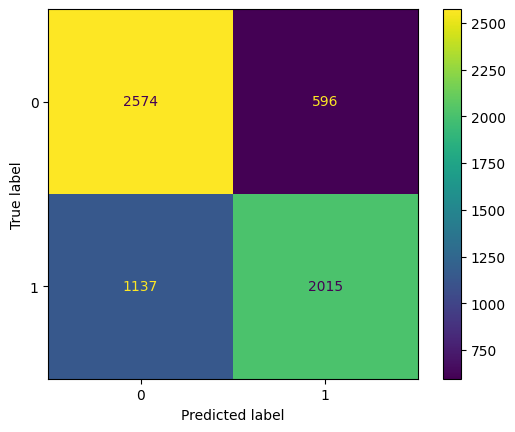

In [7]:
classification_evaluation(model=classifier_ada, x_test=X_val, y_test=y_val)

In [8]:
#Training entire X_train dataset

classifier_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__learning_rate': [0.01, 0.1, 1.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [9]:
y_predictions = classifier_ada.predict(X_test)

In [10]:
print(y_predictions[-10:], y_test[-10:].to_list())

[1 1 1 0 0 1 0 1 0 0] [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


---

## Deployment

In [11]:
explainatory, response = dataframe.drop('cardio', axis=1), dataframe['cardio']

In [12]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", scaler), ("ada", AdaBoostClassifier())])

# fits on all data
pipe.fit(explainatory, response)

Pipeline(steps=[('scaler', StandardScaler()), ('ada', AdaBoostClassifier())])

In [14]:
user1 = user_input(ap_hi=[80], ap_lo=[60],cholesterol=[1], smoke=[0], active=[1],gluc=[1],alco=[0], age=[40],bmi=[29], gender=[1])
user1

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,80,60,1,1,0,0,1,40,29,1


In [15]:
user2 = user_input(ap_hi=[120], ap_lo=[100],cholesterol=[2], smoke=[1], active=[0],gluc=[1],alco=[0], age=[56],bmi=[32], gender=[1])
user2

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,120,100,2,1,1,0,0,56,32,1


In [16]:
pipe.predict(user1)

array([0])

In [17]:
pipe.predict(user2)

array([1])